In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the category tree data
category_tree = pd.read_csv('/kaggle/input/ecommerce-dataset/category_tree.csv')

# Load the events data
events = pd.read_csv('/kaggle/input/ecommerce-dataset/events.csv')

# Load the item properties data
item_properties_part1 = pd.read_csv('/kaggle/input/ecommerce-dataset/item_properties_part1.csv')
item_properties_part2 = pd.read_csv('/kaggle/input/ecommerce-dataset/item_properties_part2.csv')

# Combine the item properties dataframes
item_properties = pd.concat([item_properties_part1, item_properties_part2])


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


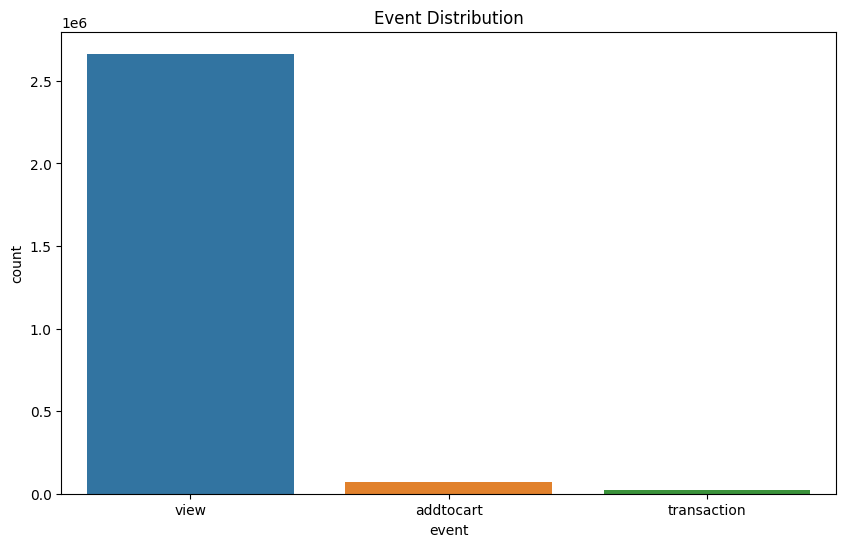

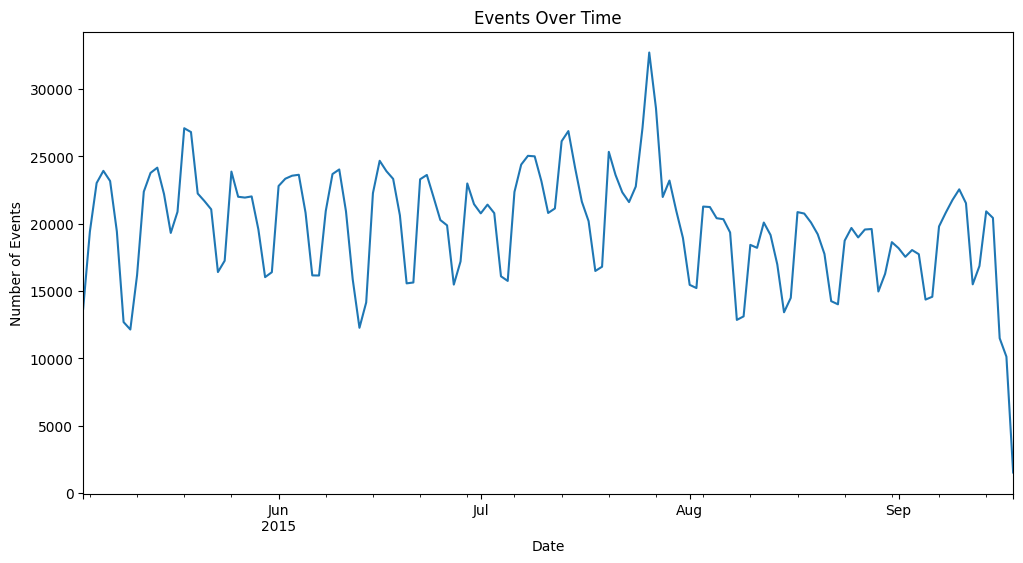

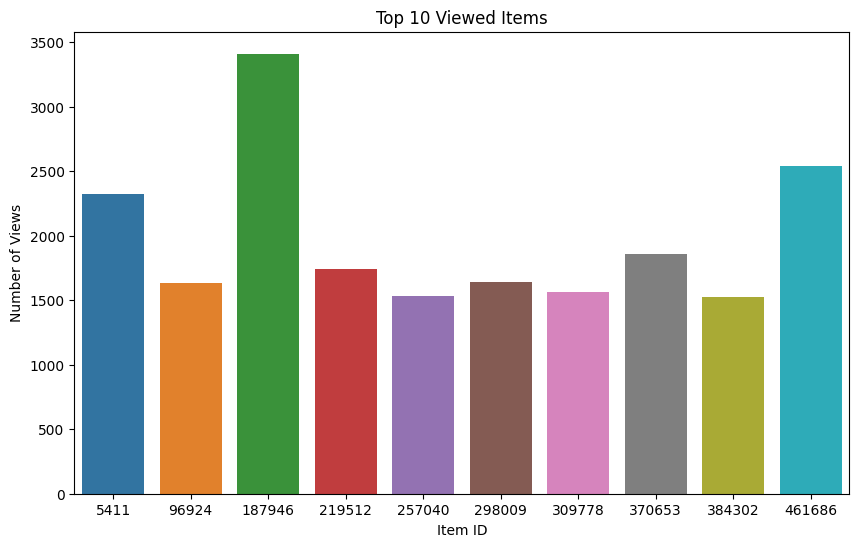

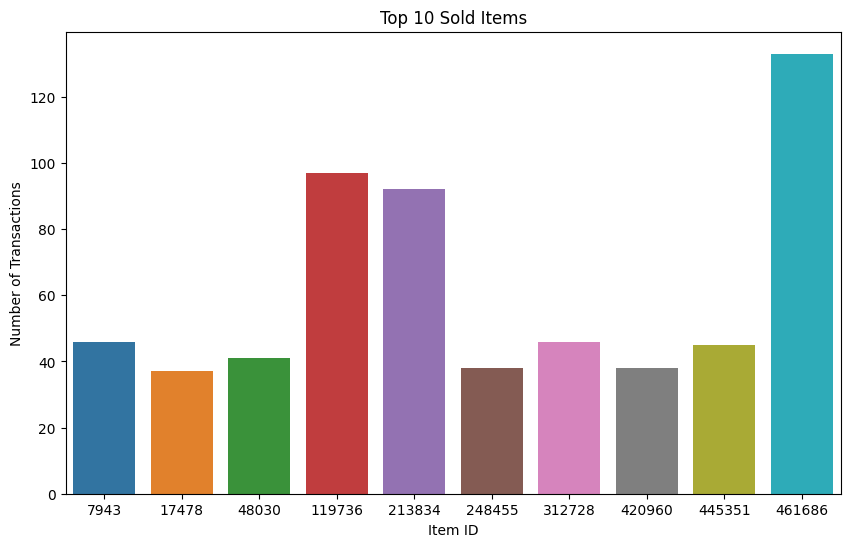

No data available for Top Categories by Views
No data available for Top Categories by Transactions


In [ ]:
import seaborn as sns

# Convert timestamp to datetime
events['datetime'] = pd.to_datetime(events['timestamp'], unit='ms')

# 1. Events distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=events, x='event')
plt.title('Event Distribution')
plt.show()

# 2. Events over time
events_daily = events.resample('D', on='datetime').count()
plt.figure(figsize=(12, 6))
events_daily['event'].plot()
plt.title('Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

# 3. Top items by views
top_viewed_items = events[events['event'] == 'view']['itemid'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_viewed_items.index, y=top_viewed_items.values)
plt.title('Top 10 Viewed Items')
plt.xlabel('Item ID')
plt.ylabel('Number of Views')
plt.show()

# 4. Top items by transactions
top_sold_items = events[events['event'] == 'transaction']['itemid'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sold_items.index, y=top_sold_items.values)
plt.title('Top 10 Sold Items')
plt.xlabel('Item ID')
plt.ylabel('Number of Transactions')
plt.show()

# 5. Merge events with item properties and category tree
merged_events = events.merge(item_properties, on=['itemid', 'timestamp'], how='left').merge(category_tree, left_on='property', right_on='categoryid', how='left')

# 6. Top categories by views
top_categories_views = merged_events[merged_events['event'] == 'view']['parentid'].value_counts().head(10)

if not top_categories_views.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_categories_views.index, y=top_categories_views.values)
    plt.title('Top 10 Categories by Views')
    plt.xlabel('Category ID')
    plt.ylabel('Number of Views')
    plt.show()
else:
    print("No data available for Top Categories by Views")

# 7. Top categories by transactions
top_categories_transactions = merged_events[merged_events['event'] == 'transaction']['parentid'].value_counts().head(10)

if not top_categories_transactions.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_categories_transactions.index, y=top_categories_transactions.values)
    plt.title('Top 10 Categories by Transactions')
    plt.xlabel('Category ID')
    plt.ylabel('Number of Transactions')
    plt.show()
else:
    print("No data available for Top Categories by Transactions")

In [ ]:
print(merged_events.head())


       timestamp  visitorid event  itemid  transactionid  \
0  1433221332117     257597  view  355908            NaN   
1  1433224214164     992329  view  248676            NaN   
2  1433221999827     111016  view  318965            NaN   
3  1433221955914     483717  view  253185            NaN   
4  1433221337106     951259  view  367447            NaN   

                 datetime property value  categoryid  parentid  
0 2015-06-02 05:02:12.117      NaN   NaN         NaN       NaN  
1 2015-06-02 05:50:14.164      NaN   NaN         NaN       NaN  
2 2015-06-02 05:13:19.827      NaN   NaN         NaN       NaN  
3 2015-06-02 05:12:35.914      NaN   NaN         NaN       NaN  
4 2015-06-02 05:02:17.106      NaN   NaN         NaN       NaN  


In [ ]:
# Print the first few rows of merged_events to check if the merging is correct
merged_events.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2756101 entries, 0 to 2756100
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      int64         
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  float64       
 5   datetime       datetime64[ns]
 6   property       object        
 7   value          object        
 8   categoryid     float64       
 9   parentid       float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 231.3+ MB


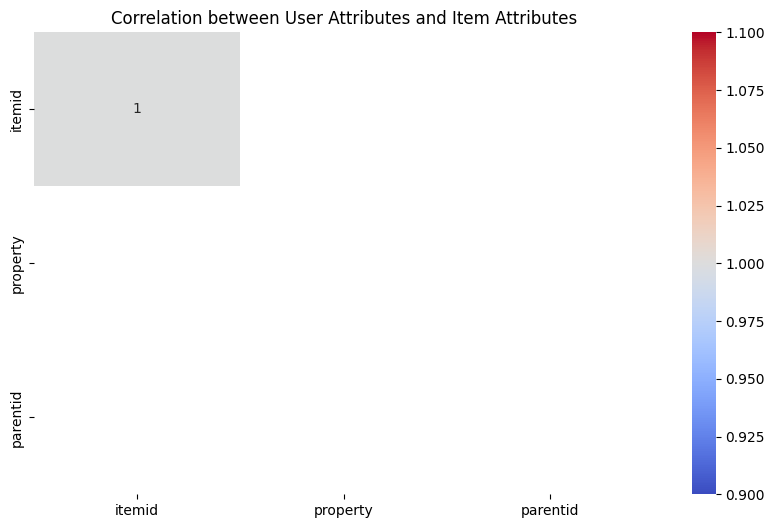

Add-to-cart to transaction conversion rate: 32.39%


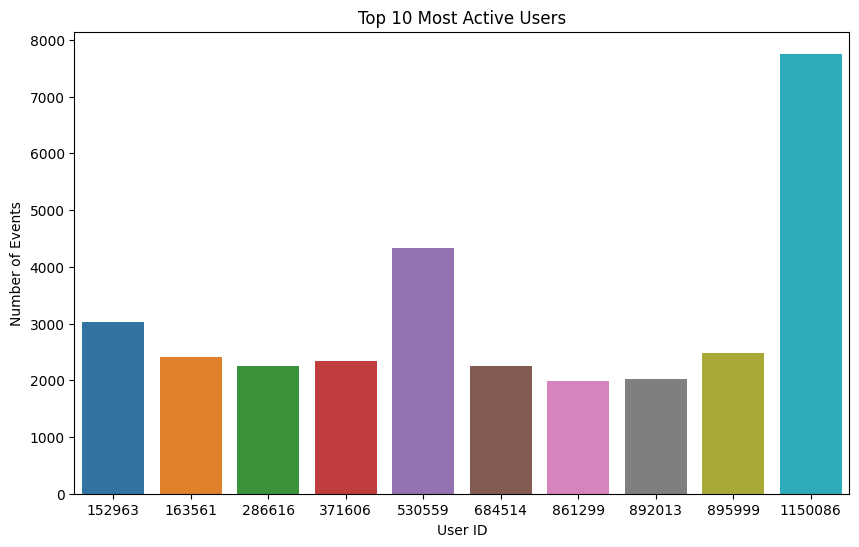

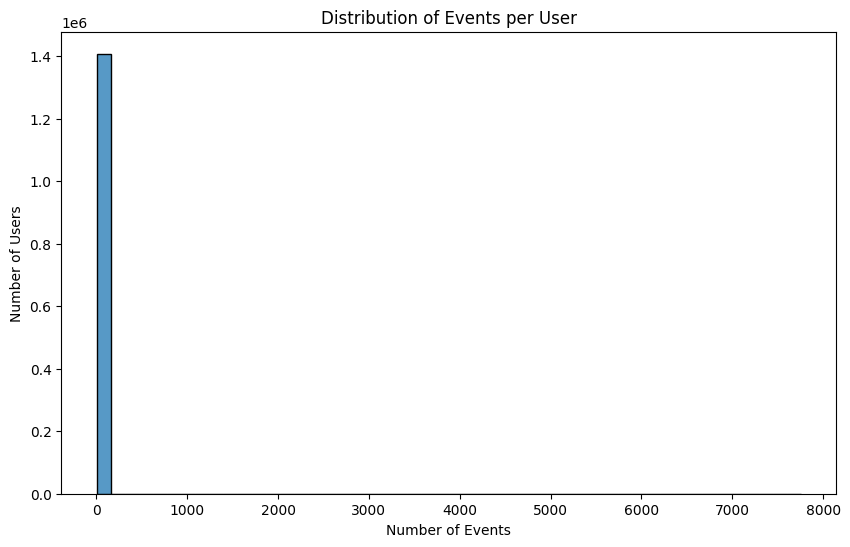

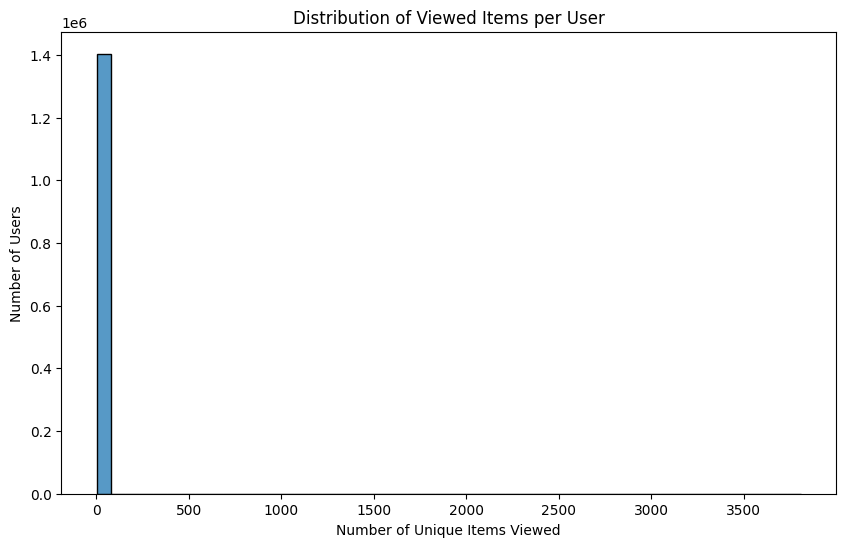

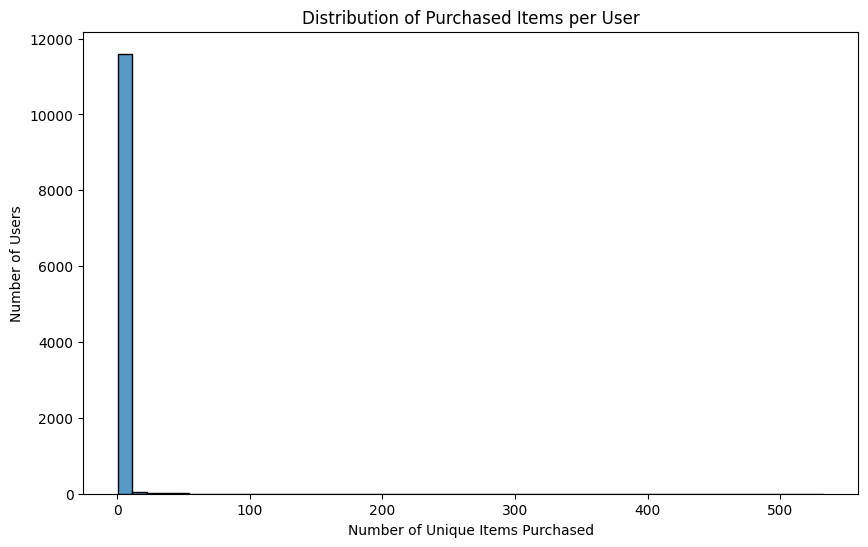

In [ ]:
# 8. Correlation between user attributes and item attributes
# You may need to adjust this part according to the available features in your dataset
user_item_merged = merged_events.groupby('visitorid').agg({
    'itemid': 'count',
    'property': 'nunique',
    'parentid': 'nunique',
})

correlation_matrix = user_item_merged.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between User Attributes and Item Attributes')
plt.show()

# 9. Add-to-cart to transaction conversion rate
add_to_cart = events[events['event'] == 'addtocart']
transactions = events[events['event'] == 'transaction']
conversion_rate = len(transactions) / len(add_to_cart)

print(f"Add-to-cart to transaction conversion rate: {conversion_rate:.2%}")

# 10. Most active users
top_active_users = events['visitorid'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_active_users.index, y=top_active_users.values)
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Events')
plt.show()

# 11. Distribution of events per user
events_per_user = events['visitorid'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(events_per_user, kde=False, bins=50)
plt.title('Distribution of Events per User')
plt.xlabel('Number of Events')
plt.ylabel('Number of Users')
plt.show()

# 12. Distribution of viewed items per user
viewed_items_per_user = events[events['event'] == 'view'].groupby('visitorid')['itemid'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(viewed_items_per_user, kde=False, bins=50)
plt.title('Distribution of Viewed Items per User')
plt.xlabel('Number of Unique Items Viewed')
plt.ylabel('Number of Users')
plt.show()

# 13. Distribution of purchased items per user
purchased_items_per_user = events[events['event'] == 'transaction'].groupby('visitorid')['itemid'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(purchased_items_per_user, kde=False, bins=50)
plt.title('Distribution of Purchased Items per User')
plt.xlabel('Number of Unique Items Purchased')
plt.ylabel('Number of Users')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate, GridSearchCV

# Load the data (assuming you already have the merged_events DataFrame from the EDA)
df = merged_events.copy()

# Feature engineering
## User-based features
user_behavior = df.groupby('visitorid').agg({
    'itemid': 'count',
    'property': 'nunique',
    'parentid': 'nunique',
    'timestamp': ['min', 'max', 'mean']
}).reset_index()

user_behavior.columns = ['visitorid', 'item_count', 'property_count', 'category_count', 'first_interaction', 'last_interaction', 'avg_interaction_time']
user_behavior['time_on_platform'] = user_behavior['last_interaction'] - user_behavior['first_interaction']
user_behavior['time_between_actions'] = user_behavior['time_on_platform'] / (user_behavior['item_count'] - 1)

## Item-based features
item_popularity = df.groupby('itemid').agg({
    'visitorid': 'count',
    'event': ['nunique', lambda x: sum(x == 'view'), lambda x: sum(x == 'addtocart'), lambda x: sum(x == 'transaction')]
}).reset_index()

item_popularity.columns = ['itemid', 'user_count', 'event_count', 'view_count', 'addtocart_count', 'transaction_count']
item_popularity['conversion_rate'] = item_popularity['transaction_count'] / item_popularity['addtocart_count']

## User-item interaction features
user_item_interactions = df.groupby(['visitorid', 'itemid']).agg({
    'event': 'count',
    'timestamp': ['min', 'max']
}).reset_index()

user_item_interactions.columns = ['visitorid', 'itemid', 'interaction_count', 'first_interaction', 'last_interaction']
user_item_interactions['time_between_interactions'] = user_item_interactions['last_interaction'] - user_item_interactions['first_interaction']

## Merge the features into a single DataFrame
user_features = user_behavior.drop(['first_interaction', 'last_interaction'], axis=1)
item_features = item_popularity.drop(['view_count', 'addtocart_count', 'transaction_count'], axis=1)
interaction_features = user_item_interactions.drop(['first_interaction', 'last_interaction'], axis=1)

features = interaction_features.merge(user_features, on='visitorid').merge(item_features, on='itemid')

In [ ]:
features.head(30)

,visitorid,itemid,interaction_count,time_between_interactions,item_count,property_count,category_count,avg_interaction_time,time_on_platform,time_between_actions,user_count,event_count,conversion_rate
0,0,67045,1,0,3,0,0,1.442005e+12,327736,1.638680e+05,205,3,0.5
1,2304,67045,1,0,21,0,0,1.431566e+12,4357600,2.178800e+05,205,3,0.5
2,15257,67045,1,0,1,0,0,1.434802e+12,0,NaN,205,3,0.5
3,42552,67045,3,9717445035,158,0,0,1.435883e+12,10201702006,6.497899e+07,205,3,0.5
4,45810,67045,1,0,1,0,0,1.434829e+12,0,NaN,205,3,0.5
5,55389,67045,1,0,213,0,0,1.431863e+12,687851939,3.244585e+06,205,3,0.5
6,59547,67045,1,0,2,0,0,1.442124e+12,65314,6.531400e+04,205,3,0.5
7,61500,67045,1,0,2,0,0,1.431827e+12,11157,1.115700e+04,205,3,0.5
8,65426,67045,1,0,4,0,0,1.434609e+12,232903,7.763433e+04,205,3,0.5
9,84271,67045,2,179698,2,0,0,1.439770e+12,179698,1.796980e+05,205,3,0.5


In [ ]:
# Collaborative filtering using matrix factorization (SVD)
reader = Reader(rating_scale=(0, 1))
train_dataset = Dataset.load_from_df(train_data[['visitorid', 'itemid', 'interaction_count']], reader)
trainset = train_dataset.build_full_trainset()

param_grid = {'n_factors': [10, 50, 100], 'n_epochs': [20, 50], 'lr_all': [0.002, 0.005], 'reg_all': [0.02, 0.1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(train_dataset)

# Best hyperparameters
best_params = gs.best_params['rmse']
print(f"Best hyperparameters for RMSE: {best_params}")

# Train the model with the best hyperparameters
algo = SVD(n_factors=best_params['n_factors'], n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])
algo.fit(trainset)

# Model evaluation
testset = list(zip(test_data['visitorid'].values, test_data['itemid'].values, test_data['interaction_count'].values))
predictions = algo.test(testset)

# Calculate evaluation metrics
mae = mean_absolute_error(test_data['interaction_count'], [pred.est for pred in predictions])
mse = mean_squared_error(test_data['interaction_count'], [pred.est for pred in predictions])
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Best hyperparameters for RMSE: {'n_factors': 10, 'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.1}
Mean Absolute Error: 0.28753883071103453
Mean Squared Error: 1.8499897270145473
Root Mean Squared Error: 1.360143274443743


Top 10 recommended items for user 32444: [421735]


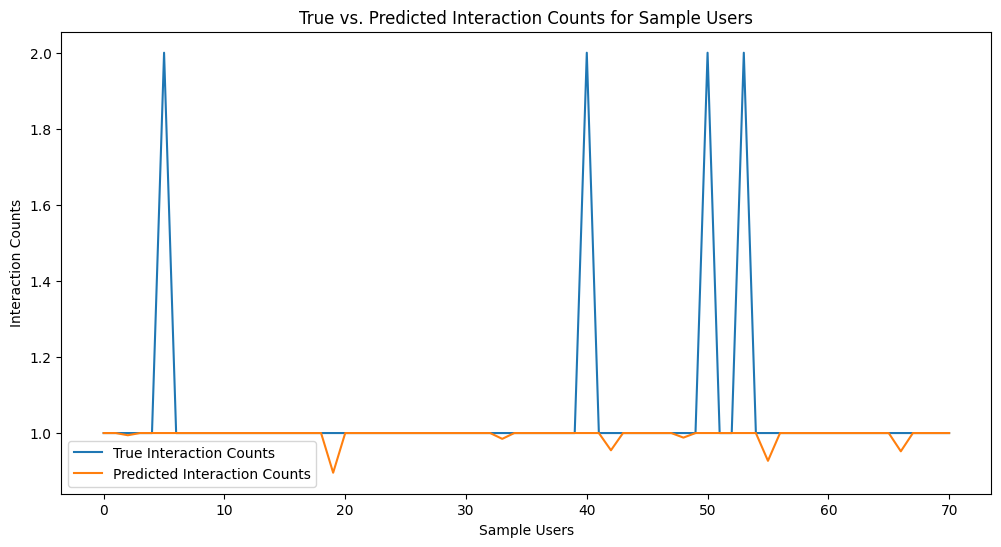

In [ ]:
# Visualizing the results
## Top-N recommendations for a user
def get_top_n(predictions, n=10):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n(predictions, n=10)

# Pick a random user ID from the top_n dictionary
user_id = random.choice(list(top_n.keys()))

try:
    recommended_items = [item[0] for item in top_n[user_id]]
    print(f"Top 10 recommended items for user {user_id}: {recommended_items}")
except KeyError:
    print(f"User {user_id} not found in the recommendations.")


## Visualize the true vs. predicted interaction counts for a sample of users
sample_users = np.random.choice(test_data['visitorid'].unique(), size=50, replace=False)
sample_preds = [pred for pred in predictions if pred.uid in sample_users]

true_counts = [pred.r_ui for pred in sample_preds]
predicted_counts = [pred.est for pred in sample_preds]

plt.figure(figsize=(12, 6))
plt.plot(true_counts, label="True Interaction Counts")
plt.plot(predicted_counts, label="Predicted Interaction Counts")
plt.xlabel("Sample Users")
plt.ylabel("Interaction Counts")
plt.legend()
plt.title("True vs. Predicted Interaction Counts for Sample Users")
plt.show()